# 3. Exploratory Data Analysis (EDA) <a id="eda"></a>

## 3.0 Setup & Load Data <a id="eda-setup"></a>

**Goal:** Load the prepared analysis dataset (`analysis_dataset.csv`) and prepare it for EDA.

**Input:**
- `data/processed/analysis_dataset.csv`

**Output:**
- `df` (DataFrame) ready for exploration, statistics, and visualization.


In [1]:
#Load and inspect
from pathlib import Path
import numpy as np
import pandas as pd

CWD = Path.cwd().resolve()
PROJECT_ROOT = CWD.parent
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

analysis_path = PROCESSED_DIR / "analysis_dataset.csv"
df = pd.read_csv(analysis_path)

print("Loaded:", analysis_path)
print("Shape:", df.shape)
df.head()


Loaded: C:\0_DA\Source\Data_Analytics_Project\data\processed\analysis_dataset.csv
Shape: (1026, 31)


,prize_id,laureate_id,motivation,share,portion,sort_order,award_year,category,category_full,date_awarded,...,birth_country_original,death_date,death_city,death_country_now,wikipedia_en,wikidata_id,decade,birth_date_parsed,date_awarded_parsed,age_at_award
0,1901_chemistry,160,in recognition of the extraordinary services h...,NaN,1,1,1901,Chemistry,The Nobel Prize in Chemistry,1901-11-12,...,the Netherlands,1911-03-01,Berlin,Germany,https://en.wikipedia.org/wiki/Jacobus_Henricus...,Q102822,1900,1852-08-30,1901-11-12,49.0
1,1901_literature,569,in special recognition of his poetic compositi...,NaN,1,1,1901,Literature,The Nobel Prize in Literature,1901-11-14,...,France,1907-09-07,Châtenay,France,https://en.wikipedia.org/wiki/Sully_Prudhomme,Q42247,1900,1839-03-16,1901-11-14,62.0
2,1901_peace,462,for his humanitarian efforts to help wounded s...,NaN,1/2,1,1901,Peace,The Nobel Peace Prize,1901-12-10,...,Switzerland,1910-10-30,Heiden,Switzerland,https://en.wikipedia.org/wiki/Henry_Dunant,Q12091,1900,1828-05-08,1901-12-10,73.0
3,1901_peace,463,for his lifelong work for international peace ...,NaN,1/2,2,1901,Peace,The Nobel Peace Prize,1901-12-10,...,France,1912-06-12,Paris,France,https://en.wikipedia.org/wiki/Frédéric_Passy,Q180409,1900,1822-05-20,1901-12-10,79.0
4,1901_physics,1,in recognition of the extraordinary services h...,NaN,1,1,1901,Physics,The Nobel Prize in Physics,1901-11-12,...,Prussia,1923-02-10,Munich,Germany,https://en.wikipedia.org/wiki/Wilhelm_Röntgen,Q35149,1900,1845-03-27,1901-11-12,56.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prize_id                1026 non-null   object 
 1   laureate_id             1026 non-null   int64  
 2   motivation              1026 non-null   object 
 3   share                   0 non-null      float64
 4   portion                 1026 non-null   object 
 5   sort_order              1026 non-null   int64  
 6   award_year              1026 non-null   int64  
 7   category                1026 non-null   object 
 8   category_full           1026 non-null   object 
 9   date_awarded            1026 non-null   object 
 10  prize_status            0 non-null      float64
 11  prize_amount            1026 non-null   int64  
 12  prize_amount_adjusted   1026 non-null   int64  
 13  laureate_type           1026 non-null   object 
 14  known_name              995 non-null    

In [3]:
# print("Columns:", len(df.columns))
# print("Unique Categories:", df["category"].nunique()) --6
print("Unique prize_id:", df["prize_id"].nunique())
print("Unique laureate_id:", df["laureate_id"].nunique())
print(df["laureate_type"].value_counts(dropna=False))

Unique prize_id: 633
Unique laureate_id: 1018
laureate_type
person          995
organization     31
Name: count, dtype: int64


In [ ]:
#df["laureate_id"].value_counts().head()

In [4]:
#missing values
missing = df.isna().sum().sort_values(ascending= False)
missing.head(20)

share                     1026
prize_status              1026
org_name                   995
death_city                 356
death_country_now          350
death_date                 334
age_at_award                55
birth_date_parsed           55
birth_city                  38
birth_country_original      34
birth_country_now           34
known_name                  31
birth_date                  31
gender                      31
full_name                   31
laureate_id                  0
laureate_type                0
prize_amount_adjusted        0
prize_amount                 0
date_awarded                 0
dtype: int64

In [5]:
#missing percentage
missing_pct = (df.isna().mean()*100).sort_values(ascending = False)
missing_pct.head(20)

share                     100.000000
prize_status              100.000000
org_name                   96.978558
death_city                 34.697856
death_country_now          34.113060
death_date                 32.553606
age_at_award                5.360624
birth_date_parsed           5.360624
birth_city                  3.703704
birth_country_original      3.313840
birth_country_now           3.313840
known_name                  3.021442
birth_date                  3.021442
gender                      3.021442
full_name                   3.021442
laureate_id                 0.000000
laureate_type               0.000000
prize_amount_adjusted       0.000000
prize_amount                0.000000
date_awarded                0.000000
dtype: float64

### Classification of missingness
Expected: org_name missing for persons; death_* missing for living laureates

In [6]:
# # convert year to numeric
# df["award_year"] = pd.to_numeric(df["award_year"], errors = "coerce")
# #df["award_year"].describe()
# df["award_year"]

In [7]:
# #derived column: decade (integer math)
# df["decade"] = (df["award_year"]//10) *10
# df[["award_year","decade"]].dropna().head(10)

In [8]:
#numpy flags
df["is_person"] = np.where(df["laureate_type"] == "person", 1, 0)
df["is_person"]
df["is_org"] = np.where(df["laureate_type"] == "organization", 1, 0)

df[["laureate_type", "is_person", "is_org"]].value_counts().head(10)

laureate_type  is_person  is_org
person         1          0         995
organization   0          1          31
Name: count, dtype: int64

## Time Trends

In [9]:
#unique prizes per year
prizes_per_year = (
    df.groupby("award_year")["prize_id"]
        .nunique()
        .reset_index(name="num_prizes")
        .sort_values("award_year")
)
prizes_per_year.tail(10)

,award_year,num_prizes
112,2016,6
113,2017,6
114,2018,6
115,2019,6
116,2020,6
117,2021,6
118,2022,6
119,2023,6
120,2024,6
121,2025,6


In [10]:
laureates_per_year = (df.groupby("award_year")["laureate_id"].nunique()
                     .reset_index(name="num_laureates")
                     .sort_values("award_year"))
laureates_per_year.tail(10)

,award_year,num_laureates
112,2016,11
113,2017,12
114,2018,13
115,2019,14
116,2020,12
117,2021,13
118,2022,14
119,2023,11
120,2024,12
121,2025,14


## Category Analysis + reshaping (pivot)

In [11]:
#Count Prizes per Category
prizes_by_category = (
    df.groupby("category")["prize_id"]
    .nunique()
    .reset_index(name="num_prizes")
    .sort_values("num_prizes",ascending=False)
)
prizes_by_category

,category,num_prizes
4,Physics,119
2,Literature,118
0,Chemistry,117
5,Physiology or Medicine,116
3,Peace,106
1,Economic Sciences,57


In [12]:
cat_by_decades = df.pivot_table(index = "decade", columns = "category",
                               values= "prize_id", aggfunc="nunique", fill_value=0)
cat_by_decades

category,Chemistry,Economic Sciences,Literature,Peace,Physics,Physiology or Medicine
decade,,,,,,
1900,9,0,9,9,9,9
1910,7,0,8,6,9,6
1920,9,0,10,7,10,8
1930,9,0,9,8,8,10
1940,7,0,6,5,7,7
1950,10,0,10,8,10,10
1960,10,1,10,8,10,10
1970,10,10,10,9,10,10
1980,10,10,10,10,10,10


## prize sharing patterns

In [13]:
#Laureates per prize (sharing)
laureates_per_prizes = (
    df.groupby("prize_id")["laureate_id"]
    .nunique()
    .reset_index(name="num_laureates")
)
laureates_per_prizes["num_laureates"].value_counts().sort_index()

num_laureates
1    362
2    149
3    122
Name: count, dtype: int64

In [14]:
sharing_by_category = (df.groupby(["category","prize_id"])["laureate_id"].nunique()
                      .reset_index(name="n_laureates")
                      .groupby("category")["n_laureates"].mean()
                      .reset_index(name="avg_laureates_per_prize")
                      .sort_values("avg_laureates_per_prize", ascending = False))
sharing_by_category

,category,avg_laureates_per_prize
5,Physiology or Medicine,2.000000
4,Physics,1.932773
1,Economic Sciences,1.736842
0,Chemistry,1.709402
3,Peace,1.349057
2,Literature,1.033898


## Demographics (persons only): gender + age
# ------------------------------------------------------------
# EDA: Persons only — Gender counts, gender trend by decade, age stats by category
# ------------------------------------------------------------

In [15]:

# 1) Filter to persons only (organizations don't have gender/age in the same way)
persons = df[df["laureate_type"] == "person"].copy()

# Quick sanity check
print("Persons rows:", persons.shape[0])
print("Unique person laureates:", persons["laureate_id"].nunique())
print()

Persons rows: 995
Unique person laureates: 990



In [16]:
# ------------------------------------------------------------
# 2) Gender counts (unique laureates, not rows)
#    Why nunique? Because each laureate can appear multiple times across prizes.
# ------------------------------------------------------------
gender_counts = (
    persons.groupby("gender")["laureate_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("Gender counts (unique laureates):")
display(gender_counts)   # Jupyter display
print()

# Optional: gender percentages
gender_pct = (gender_counts / gender_counts.sum() * 100).round(2)
print("Gender distribution (%):")
display(gender_pct)
print()


Gender counts (unique laureates):


gender
male      923
female     67
Name: laureate_id, dtype: int64


Gender distribution (%):


gender
male      93.23
female     6.77
Name: laureate_id, dtype: float64

In [17]:
# ------------------------------------------------------------
# 3) Gender trend by decade (unique laureates per decade and gender)
# ------------------------------------------------------------
gender_trend = (
    persons.groupby(["decade", "gender"])["laureate_id"]
    .nunique()
    .reset_index(name="n_laureates")
    .sort_values(["decade", "gender"])
)

print("Gender trend by decade (first 15 rows):")
display(gender_trend.head(15))
print()

# Optional: reshape to a wide table (decade as rows, gender as columns)
gender_trend_pivot = (
    gender_trend.pivot(index="decade", columns="gender", values="n_laureates")
    .fillna(0)
    .astype(int)
    .sort_index()
)

print("Gender trend pivot (last 10 decades):")
display(gender_trend_pivot.tail(10))
print()


Gender trend by decade (first 15 rows):


,decade,gender,n_laureates
0,1900,female,3
1,1900,male,53
2,1910,female,1
3,1910,male,37
4,1920,female,2
5,1920,male,52
6,1930,female,3
7,1930,male,52
8,1940,female,3
9,1940,male,37



Gender trend pivot (last 10 decades):


gender,female,male
decade,,
1930,3,52
1940,3,37
1950,0,71
1960,3,72
1970,4,99
1980,4,90
1990,7,94
2000,11,108
2010,13,104


In [18]:
# ------------------------------------------------------------
# 4) Age at award stats by category (persons with known age_at_award only)
# ------------------------------------------------------------
persons_age = persons[persons["age_at_award"].notna()].copy()

print("Rows with age_at_award available:", persons_age.shape[0])
print("Unique laureates with age_at_award:", persons_age["laureate_id"].nunique())
print()

age_stats = (
    persons_age.groupby("category")["age_at_award"]
    .agg(count="count", mean="mean", median="median", std="std")
    .reset_index()
)

# Round numeric outputs for readability
age_stats[["mean", "median", "std"]] = age_stats[["mean", "median", "std"]].round(2)

# Sort by highest average age
age_stats = age_stats.sort_values("mean", ascending=False)

print("Age at award stats by category:")
display(age_stats)


Rows with age_at_award available: 971
Unique laureates with age_at_award: 966

Age at award stats by category:


,category,count,mean,median,std
1,Economic Sciences,93,67.16,67.0,8.41
2,Literature,121,64.88,67.0,10.25
3,Peace,110,60.77,61.5,13.24
0,Chemistry,193,59.05,58.0,12.03
5,Physiology or Medicine,228,58.81,58.0,11.72
4,Physics,226,57.52,56.0,14.93


In [19]:
# Countries (persons only): count unique laureates by birth_country_now
# - groupby('birth_country_now') groups rows by country
# - nunique() counts UNIQUE laureate_id per country (avoids double-counting the same person across prizes)
# - reset_index() turns the result into a DataFrame with a clear column name
# - sort_values() ranks countries from highest to lowest laureate counts

top_countries = (persons.groupby("birth_country_now")["laureate_id"].nunique()
                 .reset_index(name="n_laureates")
                 .sort_values("n_laureates", ascending=False))

# Display the result (top rows)
top_countries.head(20)


,birth_country_now,n_laureates
78,USA,296
80,United Kingdom,94
27,Germany,84
26,France,63
41,Japan,30
72,Sweden,30
64,Russia,29
61,Poland,28
11,Canada,22
85,the Netherlands,20


In [20]:
#Age bins (if age_at_award) exists
#only persons with known age
age_df = df[(df["laureate_type"] == "person") & (df["age_at_award"].notna())].copy()

age_df["age_group"] = pd.cut(
    age_df["age_at_award"],
    bins = [0,30,40,50,60,70,80,120],
    right = False
)

age_df["age_group"].value_counts().sort_index()

age_group
[0, 30)        3
[30, 40)      48
[40, 50)     159
[50, 60)     241
[60, 70)     276
[70, 80)     183
[80, 120)     61
Name: count, dtype: int64

## Text Mining

In [21]:
# basic cleaning + keyword frequency
import re
from collections import Counter
txt = df['motivation'].dropna().astype(str).str.lower()
txt = txt.str.replace(r'[^a-z\s]', ' ', regex=True)
txt = txt.str.replace(r'\s+', ' ', regex=True).str.strip()
words = ' '.join(txt).split()
Counter(words).most_common(20)

[('of', 1285),
 ('the', 1243),
 ('for', 1138),
 ('and', 662),
 ('in', 446),
 ('their', 391),
 ('his', 376),
 ('to', 276),
 ('discovery', 208),
 ('discoveries', 169),
 ('a', 151),
 ('concerning', 121),
 ('development', 110),
 ('work', 106),
 ('on', 101),
 ('which', 99),
 ('with', 98),
 ('by', 82),
 ('theory', 74),
 ('contributions', 60)]

In [22]:
# Keywords by category (from motivation text)
# - For each Nobel category, we combine all motivation texts
# - Clean the text (lowercase, keep letters/spaces, normalize whitespace)
# - Count most frequent words and return the top N words

import re
from collections import Counter

def top_words(series, n=12):
    words = " ".join(series.dropna().astype(str)).lower()
    words = re.sub(r"[^a-z\s]", " ", words)      # keep only letters + spaces
    words = re.sub(r"\s+", " ", words).strip()   # normalize spaces
    words = words.split()
    return [w for w, _ in Counter(words).most_common(n)]

top_by_category = (
    df.groupby("category")["motivation"]
      .apply(lambda s: top_words(s, n=12))
      .reset_index(name="top_words")
)

# Display result
top_by_category


,category,top_words
0,Chemistry,"[of, the, for, and, his, in, their, developmen..."
1,Economic Sciences,"[for, of, and, the, theory, economic, their, a..."
2,Literature,"[of, the, and, for, his, in, which, a, with, h..."
3,Peace,"[for, the, and, of, to, in, his, their, peace,..."
4,Physics,"[the, of, for, and, in, discovery, his, their,..."
5,Physiology or Medicine,"[of, the, for, their, discoveries, and, concer..."


In [23]:
#spacy lemmitization
# pip install spacy
# python -m spacy download en_core_web_sm
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner','parser'])
# def lemmas(text):
# doc = nlp(text)
# return [t.lemma_ for t in doc if t.is_alpha and not t.is_stop]

# 4. Visualizations (Seaborn + Matplotlib)

This section turns EDA tables into clear plots.  

**Assumptions**
- `df` is `analysis_dataset.csv` loaded in this notebook.
- Columns used here: `award_year`, `decade`, `category`, `prize_id`, `laureate_id`, `laureate_type`, `gender`, `birth_country_now`, `age_at_award`, `motivation`.


In [24]:
# Plotting setup
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()  # clean default style

# Ensure numeric columns are correct (safe even if already done earlier)
df["award_year"] = pd.to_numeric(df["award_year"], errors="coerce")
if "decade" not in df.columns:
    df["decade"] = (df["award_year"] // 10) * 10

# Persons-only view used in several charts
persons = df[df["laureate_type"] == "person"].copy()


## 4.1 Prizes per year (trend)

**What it shows:** How many Nobel prizes are awarded each year (unique `prize_id`).  
**Why it matters:** Detects long-term stability and historical dips/spikes.


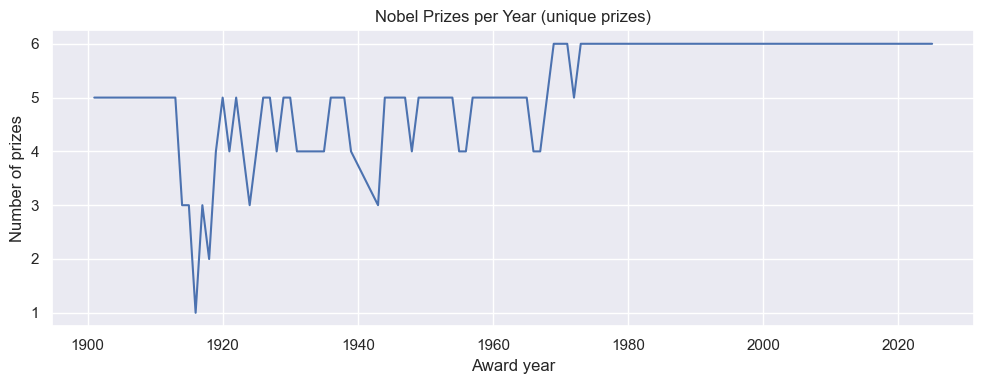

,award_year,num_prizes
112,2016,6
113,2017,6
114,2018,6
115,2019,6
116,2020,6
117,2021,6
118,2022,6
119,2023,6
120,2024,6
121,2025,6


In [25]:
prizes_per_year = (df.groupby("award_year")["prize_id"]
                   .nunique()
                   .reset_index(name="num_prizes")
                   .sort_values("award_year"))

plt.figure(figsize=(10, 4))
sns.lineplot(data=prizes_per_year, x="award_year", y="num_prizes")
plt.title("Nobel Prizes per Year (unique prizes)")
plt.xlabel("Award year")
plt.ylabel("Number of prizes")
plt.tight_layout()
plt.show()

prizes_per_year.tail(10)


## 4.2 Prizes by category (ranking)

**What it shows:** Total number of unique prizes per Nobel category.  
**Why it matters:** Quick comparison of category volumes across the full period.


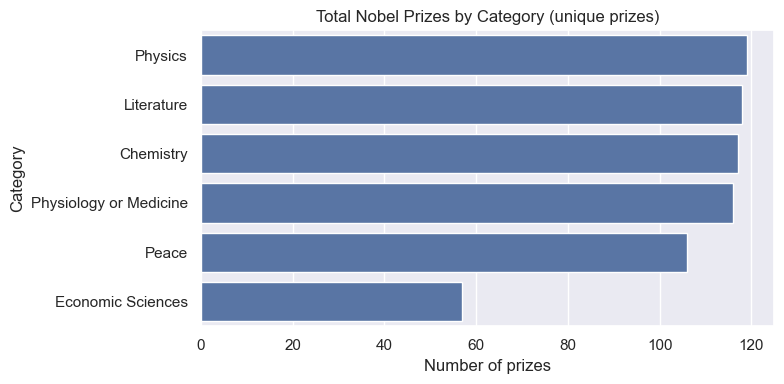

,category,num_prizes
4,Physics,119
2,Literature,118
0,Chemistry,117
5,Physiology or Medicine,116
3,Peace,106
1,Economic Sciences,57


In [26]:
prizes_by_category = (df.groupby("category")["prize_id"]
                      .nunique()
                      .reset_index(name="num_prizes")
                      .sort_values("num_prizes", ascending=False))

plt.figure(figsize=(8, 4))
sns.barplot(data=prizes_by_category, y="category", x="num_prizes")
plt.title("Total Nobel Prizes by Category (unique prizes)")
plt.xlabel("Number of prizes")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

prizes_by_category


## 4.3 Gender distribution (persons only)

**What it shows:** Count of **unique person laureates** by gender.  
**Note:** This excludes organizations and avoids double-counting people who won multiple prizes.


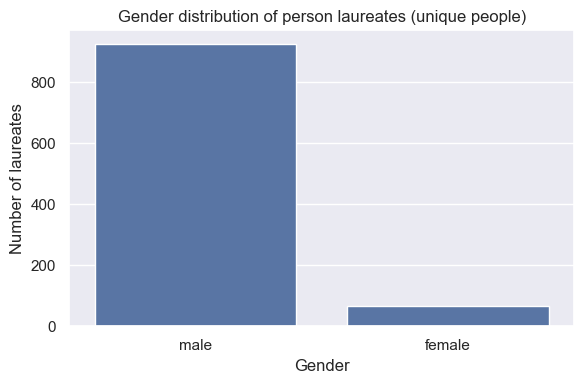

,gender,n_laureates
1,male,923
0,female,67


In [27]:
gender_counts = (persons.groupby("gender")["laureate_id"]
                 .nunique()
                 .reset_index(name="n_laureates")
                 .sort_values("n_laureates", ascending=False))

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x="gender", y="n_laureates")
plt.title("Gender distribution of person laureates (unique people)")
plt.xlabel("Gender")
plt.ylabel("Number of laureates")
plt.tight_layout()
plt.show()

gender_counts


## 4.4 Gender trend by decade (persons only)

**What it shows:** Unique laureates by gender per decade.  
**Why it matters:** Shows how representation changes over time.


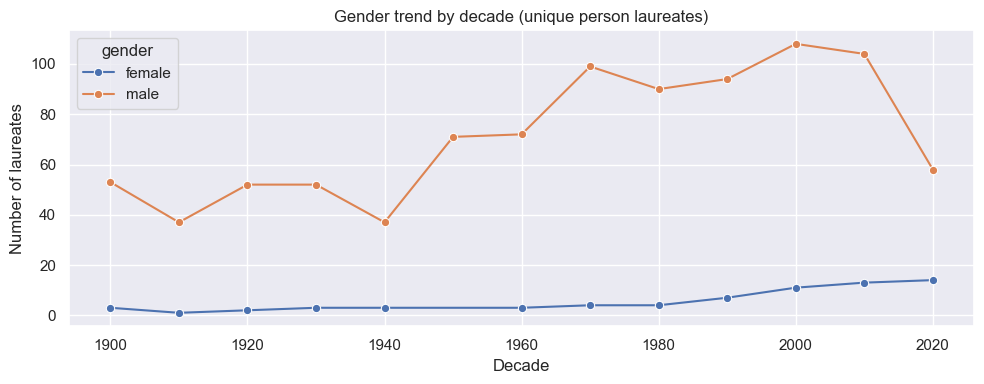

,decade,gender,n_laureates
0,1900,female,3
1,1900,male,53
2,1910,female,1
3,1910,male,37
4,1920,female,2
5,1920,male,52
6,1930,female,3
7,1930,male,52
8,1940,female,3
9,1940,male,37


In [28]:
gender_trend = (persons.groupby(["decade", "gender"])["laureate_id"]
                .nunique()
                .reset_index(name="n_laureates")
                .sort_values(["decade", "gender"]))

plt.figure(figsize=(10, 4))
sns.lineplot(data=gender_trend, x="decade", y="n_laureates", hue="gender", marker="o")
plt.title("Gender trend by decade (unique person laureates)")
plt.xlabel("Decade")
plt.ylabel("Number of laureates")
plt.tight_layout()
plt.show()

gender_trend.head(10)


## 4.5 Top birth countries (persons only)

**What it shows:** Countries with the highest number of **unique person laureates** (by `birth_country_now`).  
**Tip:** Use Top 15 to keep it readable.


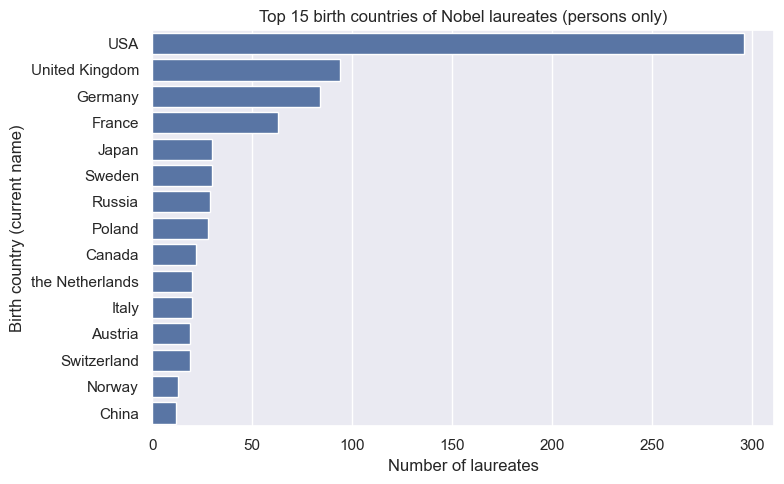

,birth_country_now,n_laureates
78,USA,296
80,United Kingdom,94
27,Germany,84
26,France,63
41,Japan,30
72,Sweden,30
64,Russia,29
61,Poland,28
11,Canada,22
85,the Netherlands,20


In [29]:
top_countries = (persons.groupby("birth_country_now")["laureate_id"].nunique()
                 .reset_index(name="n_laureates")
                 .sort_values("n_laureates", ascending=False))

top15 = top_countries.head(15)

plt.figure(figsize=(8, 5))
sns.barplot(data=top15, y="birth_country_now", x="n_laureates")
plt.title("Top 15 birth countries of Nobel laureates (persons only)")
plt.xlabel("Number of laureates")
plt.ylabel("Birth country (current name)")
plt.tight_layout()
plt.show()

top15


## 4.6 Prize sharing (how many laureates share one prize)

**What it shows:** Distribution of the number of laureates per prize (e.g., 1, 2, 3...).  
**Why it matters:** Shared prizes change how you interpret “winner counts”.


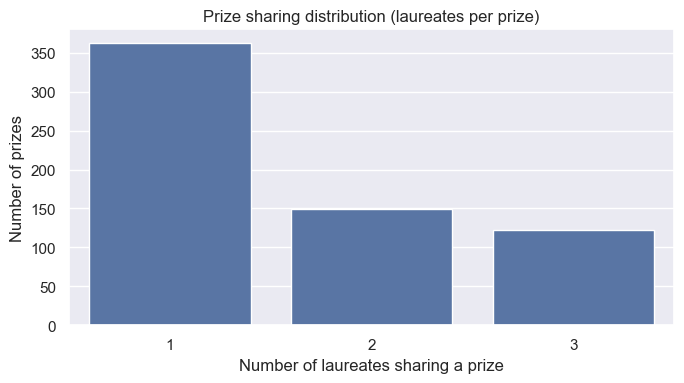

,n_laureates,num_prizes
0,1,362
1,2,149
2,3,122


In [30]:
laureates_per_prize = (df.groupby("prize_id")["laureate_id"]
                       .nunique()
                       .reset_index(name="n_laureates"))

share_dist = laureates_per_prize["n_laureates"].value_counts().sort_index().reset_index()
share_dist.columns = ["n_laureates", "num_prizes"]

plt.figure(figsize=(7, 4))
sns.barplot(data=share_dist, x="n_laureates", y="num_prizes")
plt.title("Prize sharing distribution (laureates per prize)")
plt.xlabel("Number of laureates sharing a prize")
plt.ylabel("Number of prizes")
plt.tight_layout()
plt.show()

share_dist


## 4.7 Age at award by category (persons only)

**What it shows:** Age distribution at award time, split by category.  
**Data note:** Uses only rows where `age_at_award` is available (birth date exists).


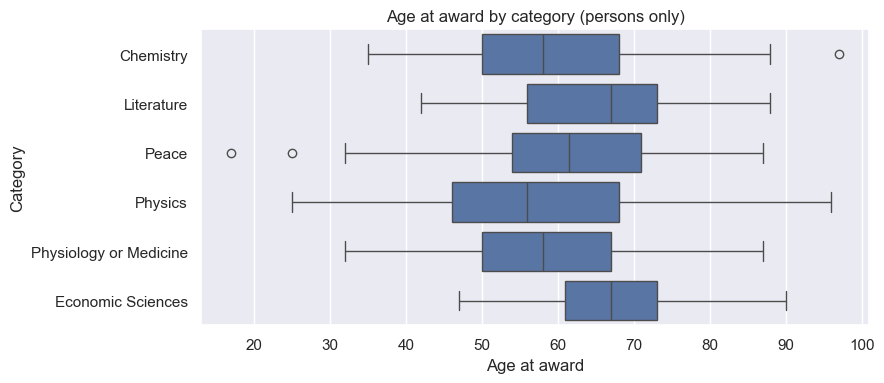

,category,count,mean,median,std
1,Economic Sciences,93,67.16,67.0,8.41
2,Literature,121,64.88,67.0,10.25
3,Peace,110,60.77,61.5,13.24
0,Chemistry,193,59.05,58.0,12.03
5,Physiology or Medicine,228,58.81,58.0,11.72
4,Physics,226,57.52,56.0,14.93


In [31]:
persons_age = persons[persons["age_at_award"].notna()].copy()

plt.figure(figsize=(9, 4))
sns.boxplot(data=persons_age, x="age_at_award", y="category")
plt.title("Age at award by category (persons only)")
plt.xlabel("Age at award")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Helpful summary table behind the boxplot
age_stats = (persons_age.groupby("category")["age_at_award"]
             .agg(count="count", mean="mean", median="median", std="std")
             .reset_index())
age_stats[["mean","median","std"]] = age_stats[["mean","median","std"]].round(2)
age_stats.sort_values("mean", ascending=False)


# 5. Text Mining — Motivation Field <a id="text-mining"></a>

**Goal:** Explore the Nobel *motivation* text to find frequent keywords overall and by category (after removing stopwords like *the, a, and*).

**Why:**
- Helps identify dominant themes per category
- Can be used later in the dashboard (e.g., “top keywords” table)

**Approach (simple + explainable):**
1. Clean motivation text (lowercase, remove punctuation)
2. Remove stopwords (common words like *the, of, and*)
3. Tokenize into words
4. Count frequency and visualize (bar charts)

**Note:** This is keyword frequency analysis — not full topic modeling.


In [32]:
#imports, stopwords, tokenizer
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Stopwords: standard English stopwords + project-specific filler words
STOPWORDS = set(ENGLISH_STOP_WORDS)

PROJECT_STOPWORDS = {
    "nobel", "prize", "prizes", "award", "awarded", "awards",
    "work", "works", "year", "also"
}
STOPWORDS |= PROJECT_STOPWORDS

def tokenize(text: str) -> list:
    """
    Clean + tokenize text:
    - lowercase
    - keep letters/spaces only
    - split into words
    - remove stopwords
    - remove very short tokens (len < 3)
    """
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)       # keep letters + spaces
    text = re.sub(r"\s+", " ", text).strip()    # normalize spaces
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS and len(t) >= 3]
    return tokens


## 5.1 Top Keywords Overall (Stopwords Removed)

Combine all motivation texts and compute the **most frequent keywords**.
This gives a general view of what terms appear most often across Nobel motivations.


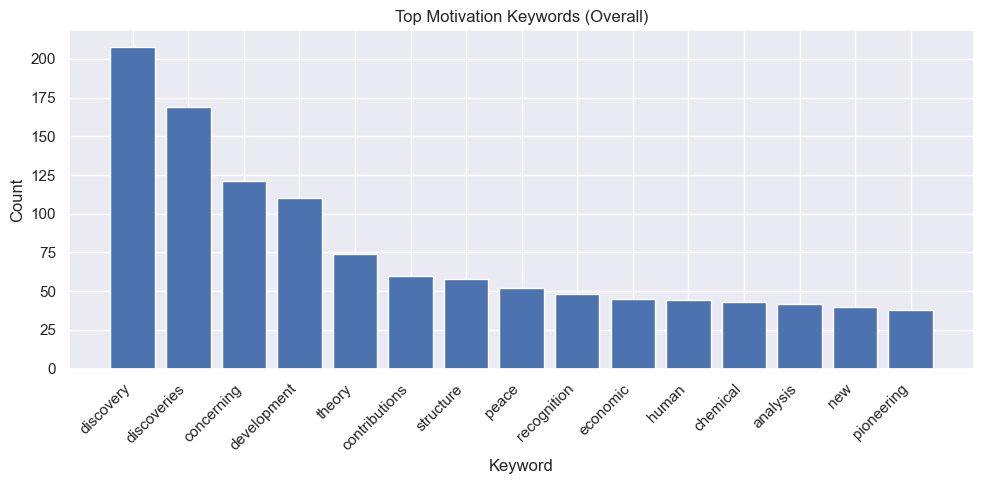

,word,count
0,discovery,208
1,discoveries,169
2,concerning,121
3,development,110
4,theory,74
5,contributions,60
6,structure,58
7,peace,52
8,recognition,48
9,economic,45


In [33]:
all_tokens = []
for m in df["motivation"].dropna():
    all_tokens.extend(tokenize(m))

top_overall = Counter(all_tokens).most_common(15)
top_overall_df = pd.DataFrame(top_overall, columns=["word", "count"])

plt.figure(figsize=(10, 5))
plt.bar(top_overall_df["word"], top_overall_df["count"])
plt.xticks(rotation=45, ha="right")
plt.title("Top Motivation Keywords (Overall)")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

top_overall_df


## 5.2 Top Keywords by Category

Analysis **within a Nobel category** (e.g., Physics, Peace).
This helps reveal category-specific themes.



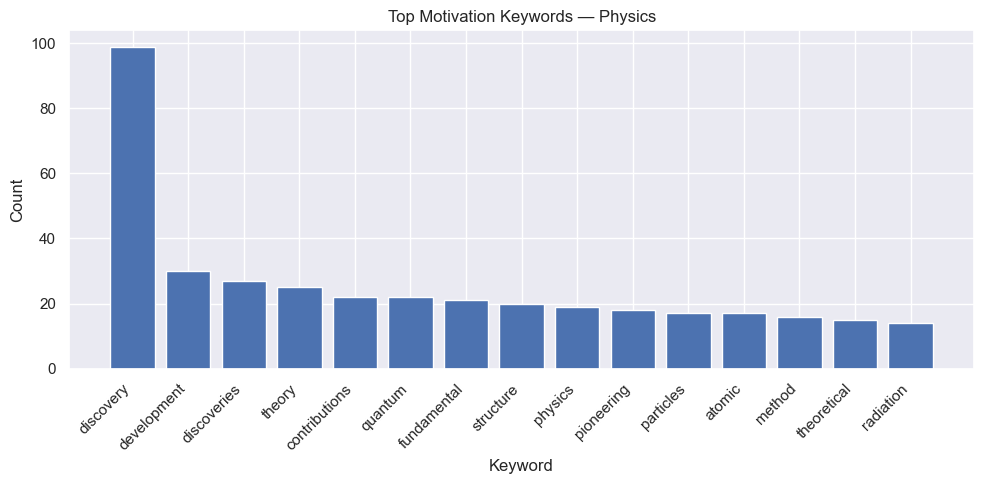

,word,count
0,discovery,99
1,development,30
2,discoveries,27
3,theory,25
4,contributions,22
5,quantum,22
6,fundamental,21
7,structure,20
8,physics,19
9,pioneering,18


In [34]:
def top_keywords_by_category(category_name: str, n=15):
    sub = df[df["category"] == category_name]["motivation"].dropna()

    tokens = []
    for m in sub:
        tokens.extend(tokenize(m))

    top = Counter(tokens).most_common(n)
    out = pd.DataFrame(top, columns=["word", "count"])

    plt.figure(figsize=(10, 5))
    plt.bar(out["word"], out["count"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top Motivation Keywords — {category_name}")
    plt.xlabel("Keyword")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    return out

# Example: change category name to explore others
top_keywords_by_category("Physics", n=15)


## 5.2.1 Keyword Comparison — Physics vs Peace

**Goal:** Compare the most frequent motivation keywords between **Physics** and **Peace** after cleaning and removing stopwords.

**Why:** These two categories often have very different language:
- **Physics** → technical/scientific terms  
- **Peace** → social/political/humanitarian terms  

Visualize the **top keywords side-by-side** to highlight the contrast.


Top keywords — Physics


,word,count
0,discovery,99
1,development,30
2,discoveries,27
3,theory,25
4,contributions,22
5,quantum,22
6,fundamental,21
7,structure,20
8,physics,19
9,pioneering,18


Top keywords — Peace


,word,count
0,peace,52
1,efforts,35
2,international,25
3,rights,23
4,war,19
5,peaceful,17
6,struggle,16
7,human,16
8,nations,15
9,role,14


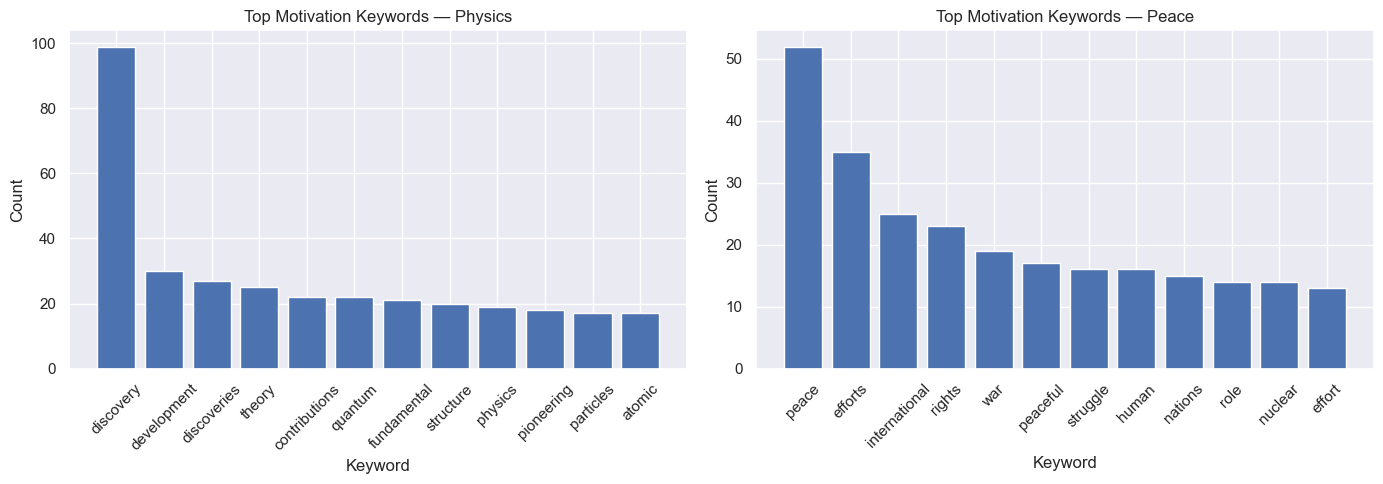

In [35]:
# Compare top keywords: Physics vs Peace (stopwords removed)
# Assumes you already defined: tokenize(), STOPWORDS, and have df loaded

def top_words_list(category_name: str, n=12):
    sub = df[df["category"] == category_name]["motivation"].dropna()
    tokens = []
    for m in sub:
        tokens.extend(tokenize(m))
    return Counter(tokens).most_common(n)

physics_top = top_words_list("Physics", n=12)
peace_top   = top_words_list("Peace", n=12)

physics_df = pd.DataFrame(physics_top, columns=["word", "count"])
peace_df   = pd.DataFrame(peace_top, columns=["word", "count"])

# Display tables (nice for reporting)
print("Top keywords — Physics")
display(physics_df)

print("Top keywords — Peace")
display(peace_df)

# Side-by-side bar charts (clean + readable)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(physics_df["word"], physics_df["count"])
axes[0].set_title("Top Motivation Keywords — Physics")
axes[0].set_xlabel("Keyword")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

axes[1].bar(peace_df["word"], peace_df["count"])
axes[1].set_title("Top Motivation Keywords — Peace")
axes[1].set_xlabel("Keyword")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


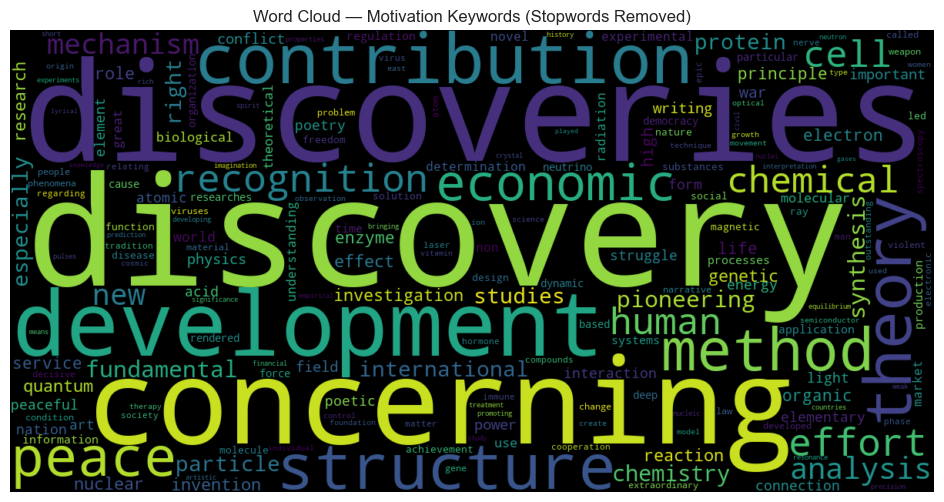

In [37]:
#word cloud from motivation text
from wordcloud import WordCloud


# Reuse existing tokenize() function and STOPWORDS set
# (from text-mining section)

# Build clean text from tokens (stopwords removed)
tokens = []
for m in df["motivation"].dropna():
    tokens.extend(tokenize(m))

clean_text = " ".join(tokens)

wc = WordCloud(
    width=1200,
    height=600,
    collocations=False  # avoids some repeated phrase artifacts
).generate(clean_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Motivation Keywords (Stopwords Removed)")
plt.show()


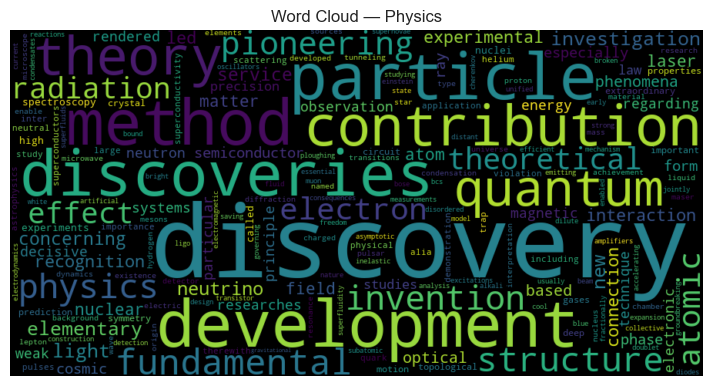

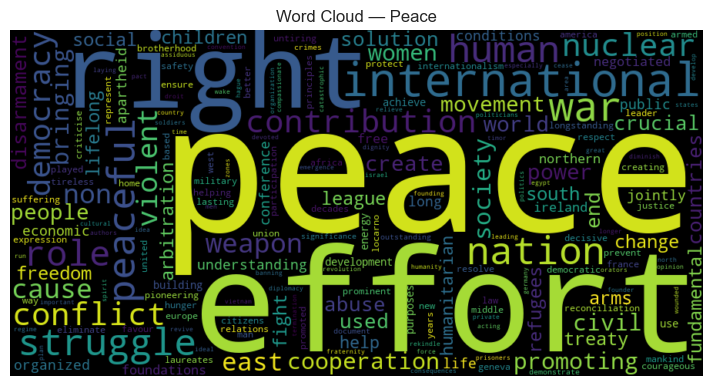

In [38]:
# peace vs physics word clouds
def wordcloud_for_category(category_name: str):
    toks = []
    for m in df.loc[df["category"] == category_name, "motivation"].dropna():
        toks.extend(tokenize(m))
    text = " ".join(toks)

    wc = WordCloud(width=900, height=450, collocations=False).generate(text)
    plt.figure(figsize=(10, 4.5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud — {category_name}")
    plt.show()

wordcloud_for_category("Physics")
wordcloud_for_category("Peace")


Total unique laureates: 1018
Max prizes by a single laureate: 3


,laureate_id,n_prizes
475,482,3
212,217,2
5,6,2
507,515,2
64,66,2
720,743,2
217,222,2
0,1,1
680,703,1
683,706,1



Distribution (counts):


1 prize      1011
2 prizes        6
3+ prizes       1
dtype: int64


Distribution (%):


1 prize      99.31
2 prizes      0.59
3+ prizes     0.10
dtype: float64


Top 15 repeat winners (table):


,laureate_id,display_name,laureate_type,n_prizes
0,482,International Committee of the Red Cross,organization,3
1,217,Linus Pauling,person,2
2,6,Marie Curie,person,2
3,515,Office of the United Nations High Commissioner...,organization,2
4,66,John Bardeen,person,2
5,743,K. Barry Sharpless,person,2
6,222,Frederick Sanger,person,2
7,1,Wilhelm Conrad Röntgen,person,1
8,703,Trygve Haavelmo,person,1
9,706,William F. Sharpe,person,1


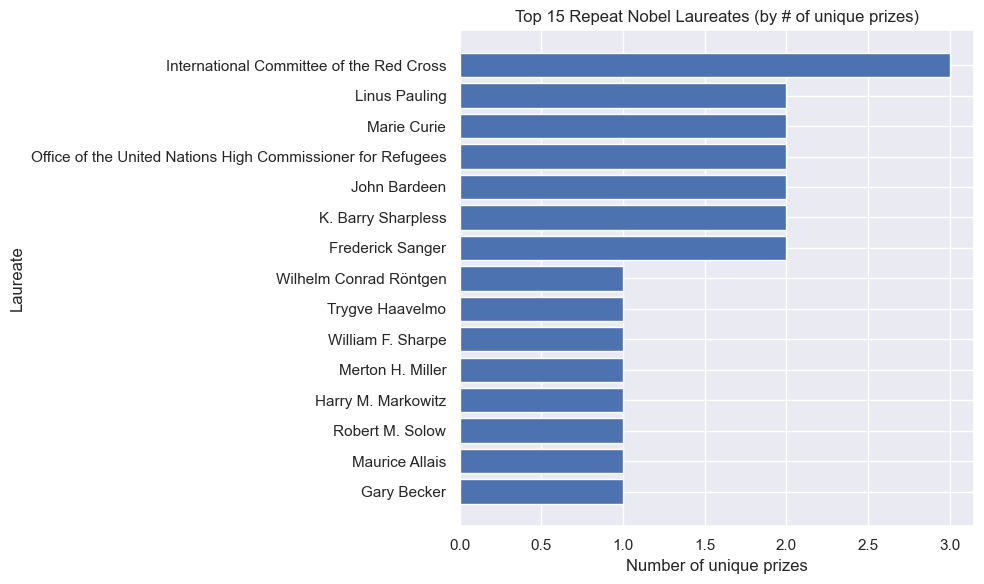

In [39]:
# ------------------------------------------------------------
# Multi-award analysis (A): prizes per laureate
# - Distribution: 1 vs 2 vs 3+ prizes
# - Top repeat winners: table + bar chart
# ------------------------------------------------------------

# 1) Count UNIQUE prizes per laureate (important: avoids double-counting shared prize rows)
prizes_per_laureate = (
    df.groupby("laureate_id")["prize_id"]
      .nunique()
      .reset_index(name="n_prizes")
      .sort_values("n_prizes", ascending=False)
)

print("Total unique laureates:", prizes_per_laureate.shape[0])
print("Max prizes by a single laureate:", prizes_per_laureate["n_prizes"].max())
display(prizes_per_laureate.head(10))

# 2) Distribution buckets: 1, 2, 3+ prizes
bucket_counts = pd.Series({
    "1 prize": (prizes_per_laureate["n_prizes"] == 1).sum(),
    "2 prizes": (prizes_per_laureate["n_prizes"] == 2).sum(),
    "3+ prizes": (prizes_per_laureate["n_prizes"] >= 3).sum(),
})
bucket_pct = (bucket_counts / bucket_counts.sum() * 100).round(2)

print("\nDistribution (counts):")
display(bucket_counts)

print("\nDistribution (%):")
display(bucket_pct)

# 3) Attach readable names for the top winners
# (organizations use org_name; persons use known_name/full_name)
laureate_names = df[["laureate_id", "laureate_type", "known_name", "full_name", "org_name"]].drop_duplicates()

top_repeat = prizes_per_laureate.merge(laureate_names, on="laureate_id", how="left")
top_repeat["display_name"] = (
    top_repeat["org_name"]
    .fillna(top_repeat["known_name"])
    .fillna(top_repeat["full_name"])
)

# Choose how many to show
TOP_N = 15
top_repeat_n = top_repeat.head(TOP_N)

print(f"\nTop {TOP_N} repeat winners (table):")
display(top_repeat_n[["laureate_id", "display_name", "laureate_type", "n_prizes"]])

# 4) Bar chart: Top repeat winners
plt.figure(figsize=(10, 6))
plt.barh(top_repeat_n["display_name"][::-1], top_repeat_n["n_prizes"][::-1])
plt.title(f"Top {TOP_N} Repeat Nobel Laureates (by # of unique prizes)")
plt.xlabel("Number of unique prizes")
plt.ylabel("Laureate")
plt.tight_layout()
plt.show()


In [40]:
#Top Repeat winners: in which field did they win
TOP_N = 15

#get the top repeat laureate IDs
top_ids = prizes_per_laureate.head(TOP_N)["laureate_id"]

#category breakdown for those laureates
(df[df["laureate_id"].isin(top_ids)]
   .groupby(["laureate_id", "category"])["prize_id"].nunique()
   .reset_index(name="n_prizes")
   .sort_values(["laureate_id", "n_prizes"], ascending=[True, False])
)


,laureate_id,category,n_prizes
0,1,Physics,1
1,6,Chemistry,1
2,6,Physics,1
3,66,Physics,2
4,217,Chemistry,1
5,217,Peace,1
6,222,Chemistry,2
7,482,Peace,3
8,515,Peace,2
9,701,Economic Sciences,1


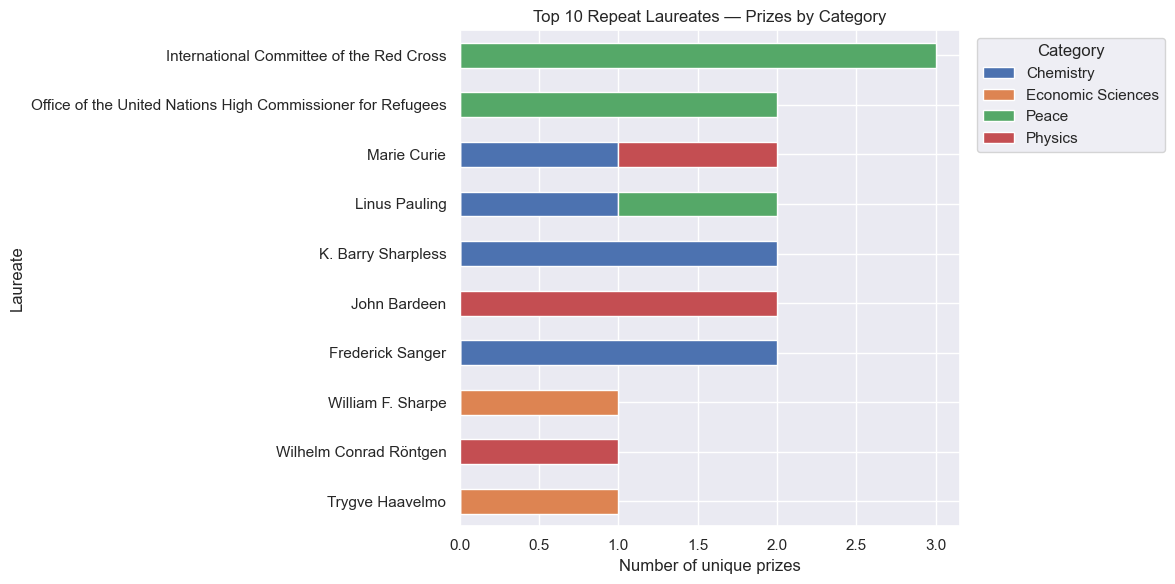

In [41]:
# Top 10 Repeat Laureates - Prizes by category
TOP_N = 10
top_ids = prizes_per_laureate.head(TOP_N)["laureate_id"]

tmp = df[df["laureate_id"].isin(top_ids)].copy()
tmp["name"] = tmp["org_name"].fillna(tmp["known_name"]).fillna(tmp["full_name"])

# counts = how many UNIQUE prizes per (name, category)
counts = (tmp.pivot_table(index="name", columns="category", values="prize_id",
                          aggfunc=pd.Series.nunique, fill_value=0))

# order names by total prizes so plot looks nice
counts = counts.loc[counts.sum(axis=1).sort_values().index]

ax = counts.plot(kind="barh", stacked=True, figsize=(12, 6))
ax.set_title(f"Top {TOP_N} Repeat Laureates — Prizes by Category")
ax.set_xlabel("Number of unique prizes")
ax.set_ylabel("Laureate")

plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

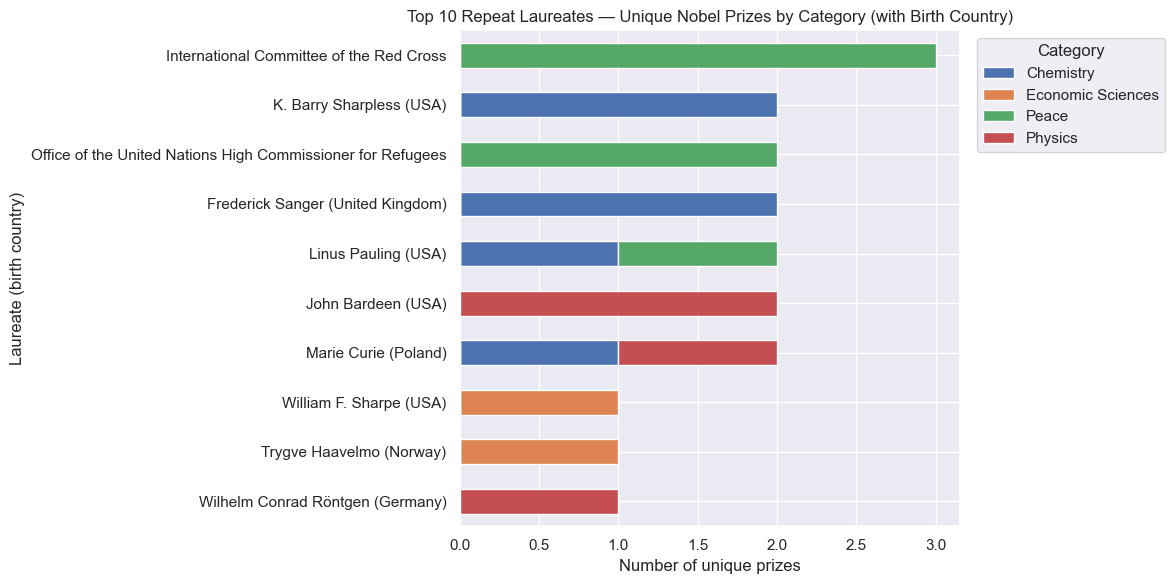

In [42]:
# Top 10 Repeat Laureates - Prizes by category / country included
TOP_N = 10
top_ids = prizes_per_laureate.head(TOP_N)["laureate_id"]

tmp = df[df["laureate_id"].isin(top_ids)].copy()
tmp["name"] = tmp["org_name"].fillna(tmp["known_name"]).fillna(tmp["full_name"])

# 1) Counts: unique prizes per laureate x category
counts = tmp.pivot_table(
    index="laureate_id",
    columns="category",
    values="prize_id",
    aggfunc=pd.Series.nunique,
    fill_value=0
)

# 2) Build label: "Name (Country)"
meta = (tmp.groupby("laureate_id")
          .agg(
              name=("name", "first"),
              country=("birth_country_now", lambda s: s.dropna().mode().iat[0] if not s.dropna().mode().empty else pd.NA)
          ))

# order by total prizes
counts = counts.loc[counts.sum(axis=1).sort_values().index]

labels = meta.loc[counts.index]
counts.index = labels.apply(
    lambda r: f"{r['name']} ({r['country']})" if pd.notna(r["country"]) else r["name"],
    axis=1
)

ax = counts.plot(kind="barh", stacked=True, figsize=(12, 6))
ax.set_title(f"Top {TOP_N} Repeat Laureates — Unique Nobel Prizes by Category (with Birth Country)")
ax.set_xlabel("Number of unique prizes")
ax.set_ylabel("Laureate (birth country)")

plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [43]:
# Youngest vs Oldest Nobel laureate at award (persons only)
# Output includes: name, gender, birth country, category, award_year, age_at_award

persons_age = df[(df["laureate_type"] == "person") & (df["age_at_award"].notna())].copy()

# Build a readable name (fallback order)
persons_age["name"] = (
    persons_age["known_name"]
    .fillna(persons_age["full_name"])
    .fillna(persons_age["org_name"])
)

# Youngest
youngest = (persons_age.sort_values("age_at_award", ascending=True)
            .loc[:, ["name", "gender", "birth_country_now", "category", "award_year", "age_at_award"]]
            .head(1))

# Oldest
oldest = (persons_age.sort_values("age_at_award", ascending=False)
          .loc[:, ["name", "gender", "birth_country_now", "category", "award_year", "age_at_award"]]
          .head(1))

print("Youngest Nobel laureate at award:")
display(youngest)

print("Oldest Nobel laureate at award:")
display(oldest)


Youngest Nobel laureate at award:


,name,gender,birth_country_now,category,award_year,age_at_award
882,Malala Yousafzai,female,Pakistan,Peace,2014,17.0


Oldest Nobel laureate at award:


,name,gender,birth_country_now,category,award_year,age_at_award
936,John B. Goodenough,male,Germany,Chemistry,2019,97.0
